In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from crypto_chatter.data.load_raw_data import load_raw_data
from crypto_chatter.graph import CryptoTwitterReplyGraph
from crypto_chatter.config import (
    ES_TWITTER_QUERY,
    ES_HOSTNAME,
    ES_TWITTER_COLUMNS,
    ES_TWITTER_MAPPINGS,
    ES_TWITTER_KEYWORDS,
    DATA_DIR,
    CryptoChatterDataConfig,
)
import networkx as nx


In [4]:
data_source = 'twitter'
index_name = 'blockchain-interoperability-attacks'

es_query = ES_TWITTER_QUERY
es_query['query']['bool']['must'] = {
    "simple_query_string": {
        "query": ' '.join(ES_TWITTER_KEYWORDS),
        "fields": [
            "text",
            "extended_tweet.full_text"
        ],
    }
}

data_config = CryptoChatterDataConfig(
            es_hostname=ES_HOSTNAME,
            es_index=index_name,
            es_columns=ES_TWITTER_COLUMNS,
            es_mappings=ES_TWITTER_MAPPINGS,
            es_query=es_query,
            data_source=data_source,
            node_id_col='id',
            raw_snapshot_dir = DATA_DIR / f'twitter/{index_name}/snapshots',
            graph_dir = DATA_DIR / f'twitter/{index_name}/graph',
            graph_gephi_dir = DATA_DIR / f'twitter/{index_name}/graph/gephi',
            graph_components_dir = DATA_DIR / f'twitter/{index_name}/graph/components',
            graph_stats_file = DATA_DIR / f'twitter/{index_name}/graph/stats.json',
            graph_edges_file = DATA_DIR / f'twitter/{index_name}/graph/edges.json',
            graph_nodes_file = DATA_DIR / f'twitter/{index_name}/graph/nodes.json',
            graph_data_file = DATA_DIR / f'twitter/{index_name}/graph/graph_data.pkl',
            graph_attributes = ['full_text', 'user.id', 'user.followers_count', 'favorite_count', 'quote_count'],
        )
data_config.raw_snapshot_dir.mkdir(parents=True, exist_ok=True)
data_config.graph_dir.mkdir(parents=True, exist_ok=True)
data_config.graph_components_dir.mkdir(parents=True, exist_ok=True)

In [6]:
# df = load_raw_data(data_config)

In [7]:
df.head(10)

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
0,Fri Nov 11 12:03:53 +0000 2022,NaN,0,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",NaN,NaN,NaN,1591039006850310148,0,NaN,...,False,NaN,Mon Jul 11 06:36:43 +0000 2011,7050,5554,True,333239871,"CARBONdale, CO",NaN,NaN
1,Fri Nov 11 12:03:53 +0000 2022,Never seen such a deal for a punk since 2017! ...,0,Never seen such a deal for a punk since 2017! ...,NaN,NaN,NaN,1591039006770622468,0,Fri Nov 11 11:00:59 +0000 2022,...,True,NaN,Wed Nov 09 14:09:46 +0000 2022,0,2,False,1590345908172083201,Netherlands,NaN,NaN
2,Fri Nov 11 12:03:53 +0000 2022,Collection: ens \n Sold for: 1.0040189 Eth (12...,0,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN,NaN,NaN,1591039006501994503,0,NaN,...,True,NaN,Sun May 01 15:06:34 +0000 2022,106,2,False,1520781667769614337,blockchain,NaN,NaN
3,Fri Nov 11 12:03:54 +0000 2022,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,0,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN,NaN,NaN,1591039007357550592,0,NaN,...,True,NaN,Wed Dec 18 21:46:55 +0000 2013,0,0,False,2252580014,None,NaN,NaN
4,Fri Nov 11 12:03:54 +0000 2022,@abu_crypto1 🩸 Scary bunny is a meme token wit...,0,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN,NaN,NaN,1591039007764668417,0,NaN,...,True,NaN,Tue Oct 25 03:46:04 +0000 2022,3,50,False,1584753080113025025,None,NaN,NaN
5,Fri Nov 11 12:03:54 +0000 2022,We on it fam! 🦾 @Zibex13Zibex @SushmaPatel13 @...,0,We on it fam! 🦾 @Zibex13Zibex @SushmaPatel13 @...,NaN,NaN,NaN,1591039007827595264,0,Fri Nov 11 05:26:44 +0000 2022,...,True,NaN,Sun Nov 06 15:43:41 +0000 2022,0,3,False,1589282375837650944,Sierra Leone,NaN,NaN
6,Fri Nov 11 12:03:54 +0000 2022,@mishaboar @boni83737812 I Wish I discovered t...,0,@mishaboar @boni83737812 I Wish I discovered t...,NaN,NaN,NaN,1591039008205070336,0,NaN,...,True,NaN,Tue Dec 17 09:02:37 +0000 2013,0,1,False,2250097452,None,NaN,NaN
7,Fri Nov 11 12:03:54 +0000 2022,token Status!? still going?? $APTOS @hanrris98...,0,token Status!? still going?? $APTOS @hanrris98...,NaN,NaN,NaN,1591039008406020097,0,Fri Nov 11 05:26:44 +0000 2022,...,True,NaN,Tue Nov 01 23:12:50 +0000 2022,0,2,False,1587583470859161601,"Bonaire, Sint Eustatius a",NaN,NaN
8,Fri Nov 11 12:03:54 +0000 2022,NaN,0,I really need to learn how to dev on blockchai...,NaN,NaN,NaN,1591039008800641025,0,Fri Nov 11 11:30:06 +0000 2022,...,False,NaN,Thu Nov 11 10:47:29 +0000 2021,198,689,False,1458748164635181060,banjarmasin,NaN,NaN
9,Fri Nov 11 12:03:54 +0000 2022,NaN,0,@RetirementRight Clearly you don't understand ...,NaN,NaN,NaN,1591039008930689024,0,NaN,...,False,NaN,Thu Apr 15 17:45:25 +0000 2021,93,524,False,1382751867868942337,None,NaN,NaN


In [8]:
len(df)

16625047

In [9]:
df.columns

Index(['created_at', 'extended_tweet.full_text', 'favorite_count', 'full_text',
       'geo', 'geo.coordinates', 'geo.type', 'id', 'quote_count',
       'quoted_status.created_at', 'quoted_status.extended_tweet.full_text',
       'quoted_status.favorite_count', 'quoted_status.full_text',
       'quoted_status.geo', 'quoted_status.id', 'quoted_status.quote_count',
       'quoted_status.reply_count', 'quoted_status.retweet_count',
       'quoted_status.text', 'quoted_status.truncated',
       'quoted_status.user.created_at', 'quoted_status.user.followers_count',
       'quoted_status.user.friends_count', 'quoted_status.user.geo_enabled',
       'quoted_status.user.id', 'quoted_status.user.location', 'reply_count',
       'retweet_count', 'text', 'truncated',
       'truncatedquoted_status.truncated', 'user.created_at',
       'user.followers_count', 'user.friends_count', 'user.geo_enabled',
       'user.id', 'user.location', 'quoted_status.geo.coordinates',
       'quoted_status.geo.type

In [10]:
user_id_frequency = df['user.id'].value_counts()
user_id_frequency = user_id_frequency.sort_values(ascending=False)

In [11]:
top = 10000
top_freqs = user_id_frequency.head(top)
top_freqs

user.id
1518863995662389248    27082
1551067188882116608    19363
1501922448324927500    16546
1569120919356084225    15792
1551237890302156802    12750
                       ...  
911613514137182208       152
1585811791501983744      152
1239641591561752576      152
1482217961255731200      152
1462071840               152
Name: count, Length: 10000, dtype: int64

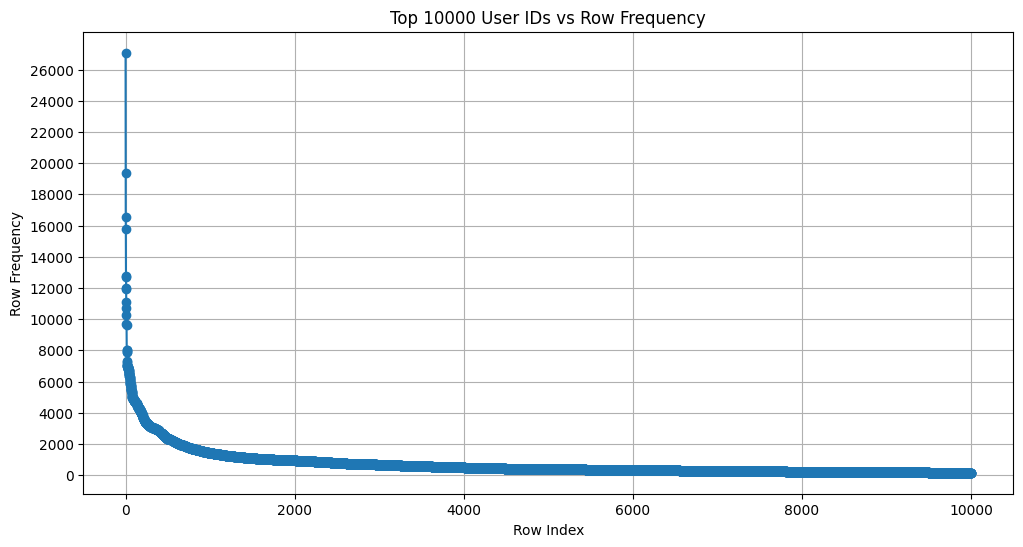

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(top_freqs.values, linestyle='-', marker='o')
plt.title('Top ' + str(top) + ' User IDs vs Row Frequency')
plt.xlabel('Row Index')
plt.ylabel('Row Frequency')
plt.yticks(range(0, max(top_freqs), 2000))  # Adjust the step as needed
plt.grid(True)
plt.show()

In [13]:
user_id_frequency.head(10)

user.id
1518863995662389248    27082
1551067188882116608    19363
1501922448324927500    16546
1569120919356084225    15792
1551237890302156802    12750
1462970957061107712    12720
1548018226189086720    12023
1520781667769614337    11907
922928836836130816     11123
1495015555283120130    10698
Name: count, dtype: int64

In [14]:
N = 10

tweet_samples = []

for uid in user_id_frequency.head(N).index:
    freq = user_id_frequency[uid]
    tweet = df[df['user.id'] == uid]['full_text'].values[0]
    tweet_samples.append({'User_ID': uid, 'Frequency': freq, 'Full_Text': tweet})
    
pd.set_option('display.max_colwidth', 120)
tweet_samples = pd.DataFrame(tweet_samples)

tweet_samples

,User_ID,Frequency,Full_Text
0,1518863995662389248,27082,@thisuserh Your screenshot can be found below 😁!\n\n🤩Ad: This Crypto project SAFCOIN1 has grown by 500% despite the ...
1,1551067188882116608,19363,#Ethereum price update: \n\n#ETH $1278.96 USD\n#Bitcoin 0.07359387569323687 #BTC\n\nFollow for recent ETH price upda...
2,1501922448324927500,16546,#Binance Last Price $296 #BNB 🚀\nDaily Indicators:\n-RSI: 47.2\n-Moving Average(20): 310\n-MA(50): 290\n-MA(200): 28...
3,1569120919356084225,15792,$256.37k #BTC bought at $17365.1 (USDT) on Binance Spot.\n\n#BTC $BTC #crypto #whale #alert\nFor real-time Whale ins...
4,1551237890302156802,12750,"#BSCGems #BNB #Crypto #BSCGemsAlert #altcoins #Binance #100x\n28 days, 16:54:56\n\nTell Them Joe Coin Sent you\n 👀👀 ..."
5,1462970957061107712,12720,"#BSCGems #BNB #Crypto #BSCGemsAlert #altcoins #Binance #100x\n28 days, 16:54:36\n\nTell Them Joe Coin Sent you\n 👀👀 ..."
6,1548018226189086720,12023,"#BSCGems #BNB #Crypto #BSCGemsAlert #altcoins #Binance #100x\n28 days, 16:54:38\n\nTell Them Joe Coin Sent you\n 👀👀 ..."
7,1520781667769614337,11907,Collection: ens \n Sold for: 1.0040189 Eth (1282.965470987 USD) \n Seller:0x5654967dc2c3f207b68bbd8003bc27a0a4106b56...
8,922928836836130816,11123,"@bello_wrld Autobots, Roll out! Claim your #EarthSparkPizzaNight 🍕 prize here https://t.co/5I6eJJppc3 . Stream @Nick..."
9,1495015555283120130,10698,"#BCHUSDT Bear Alert!\n\n5X Volume\nPrice: 105.1\n5-min %: 0.0%\nVolume: $167,753\n \n#crypto #whale #btc #eth ..."


In [15]:
ind = 50000
user_id_frequency.iloc[ind]
df[df['user.id'] == user_id_frequency.index[ind]]['full_text'].values[0]


'Online class homework, assignment and exam expert help with\n\nPublic Administration\nAccounting and Financial Management\nDental Technology\nEnvironmental Studies\nGeomatics &amp; Geospatial Information Systems(#Geomatics)\nApplied Statistics with Programming\nCriminology, Security Studies'

In [16]:
retweets = df[['id', 'retweet_count', 'full_text', 'user.id']].sort_values(by='retweet_count', ascending=False)
retweets = retweets.reset_index(drop=True)

In [17]:
retweets.head(20)

,id,retweet_count,full_text,user.id
0,1594764842220617728,167677,As a Qatari I’m proud of what happened. \nI don’t know when will the westerners realize that their values aren’t uni...,2549754319
1,1592881058537648129,135855,"We’re excited to share, we have:\n\n1) Raised $200M and now have a total of $458M in mission-driven funding\n2) Deci...",1191702416971968512
2,1590359451353067520,41810,"Ground Control to Major Dog: we’re excited to announce DOGyssey, an adventure that rewards Tally Ho users for explor...",1346646594314244097
3,1594674635311824898,38973,"DAO Maker is a proud launch partner for the #TrustWalletExtension! To celebrate, everyone who completes the steps be...",1143108958326054912
4,1594632582230347777,37828,"DAO Maker is pleased to announce a giveway in partnership with Trust Wallet !\n\nWe’re giving away $2,000 in $TWT be...",1143108958326054912
5,1587997517639294976,36181,"Senator Mike Lee caught ON TAPE saying he wants to ""phase out Social Security, pull it up from the roots, get rid of...",1640929196
6,1593182155647029253,34988,"⚽WinGoal $MLS Airdrops start NOW!🔥🔥\n\n💰13,100 Winners share 80,000 $MLS, TOP 100 get more rewards!💰\n\n⏰End Time: 1...",1570748129846366209
7,1591348321116749825,29231,"🎙️ Abdullah Al Nasari, Head of Security at the World Cup in Qatar... 🏳️‍🌈🇶🇦 https://t.co/gDnJfnmnrd",462312323
8,1594721724746338305,26910,Just now: Security guard refusing to let me into the stadium for USA-Wales. “You have to change your shirt. It’s not...,36623013
9,1591543049339174912,25305,Motion activated home security camera working as intended.. https://t.co/T0XayfPYeu,1130021685351079938


In [18]:
df[df['user.id'] == 1349149096909668363]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
99482,Tue Nov 08 18:50:00 +0000 2022,I'm focused on investing in America.\n\nCongressional Republicans are focused on placing foundational programs like ...,11849,I'm focused on investing in America.\n\nCongressional Republicans are focused on placing foundational programs like ...,NaN,NaN,NaN,1590054044009402369,323,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27527128,12,False,1349149096909668363,None,NaN,NaN
99932,Mon Nov 07 15:30:00 +0000 2022,Congressional Republicans have embraced plans to cut Social Security and Medicare – like reducing benefits or increa...,14682,Congressional Republicans have embraced plans to cut Social Security and Medicare – like reducing benefits or increa...,NaN,NaN,NaN,1589641323077898241,509,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27525621,12,False,1349149096909668363,None,NaN,NaN
9687,Tue Nov 01 17:35:18 +0000 2022,I’m on my way to Florida to highlight how we’re protecting Social Security and Medicare and lowering prescription dr...,25220,I’m on my way to Florida to highlight how we’re protecting Social Security and Medicare and lowering prescription dr...,NaN,NaN,NaN,1587498528724623360,424,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27528023,12,False,1349149096909668363,None,NaN,NaN
53107,Thu Nov 03 17:16:57 +0000 2022,Let’s be clear about what “changes” Republicans in Congress want to make to Medicare and Social Security.\n\nThey wa...,20179,Let’s be clear about what “changes” Republicans in Congress want to make to Medicare and Social Security.\n\nThey wa...,NaN,NaN,NaN,1588218688968462337,599,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27599836,13,False,1349149096909668363,None,NaN,NaN
73534,Wed Nov 02 23:00:08 +0000 2022,Social Security and Medicare are more than government programs.\n\nThey’re a promise we make. A promise that generat...,9903,Social Security and Medicare are more than government programs.\n\nThey’re a promise we make. A promise that generat...,NaN,NaN,NaN,1587942665357778944,188,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27616969,13,False,1349149096909668363,None,NaN,NaN
40423,Tue Nov 15 00:30:00 +0000 2022,"At COP27 in Egypt, I made it clear that because of this Administration's historic climate action and work to advance...",3466,"At COP27 in Egypt, I made it clear that because of this Administration's historic climate action and work to advance...",NaN,NaN,NaN,1592313936359161858,14,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27590042,13,False,1349149096909668363,None,NaN,NaN
69717,Tue Nov 01 19:30:28 +0000 2022,"You’ve been paying into Social Security your whole life. You earned it.\n\nNow, Republicans in Congress want to cut ...",101204,"You’ve been paying into Social Security your whole life. You earned it.\n\nNow, Republicans in Congress want to cut ...",NaN,NaN,NaN,1587527513953415168,2253,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27705409,13,False,1349149096909668363,None,NaN,NaN
65878,Sun Nov 06 21:30:00 +0000 2022,"Folks, there’s nothing that will create more chaos and more damage to the American economy than if Republicans in Co...",26148,"Folks, there’s nothing that will create more chaos and more damage to the American economy than if Republicans in Co...",NaN,NaN,NaN,1589369533072015361,587,NaN,...,True,NaN,Wed Jan 13 00:37:08 +0000 2021,27694906,13,False,1349149096909668363,None,NaN,NaN
20982,Tue Nov 01 18:56:43 +0000 2022,NaN,5140,Tune in as I deliver remarks on protecting Social Security and Medicare and lowering prescription drug costs. https:...,NaN,NaN,NaN,1587519019707355136,72,NaN,...,False,NaN,Wed Jan 13 00:37:08 +0000 2021,27587685,13,False,1349149096909668363,None,NaN,NaN
21031,Wed Nov 02 01

In [43]:
has_reply = df[~df['quoted_status.id'].isna()]

3590426

In [49]:
# condition1 = ~df['user.id'].isna()
condition1 = True
condition2 = ~df['quoted_status.user.id'].isna()
has_reply = df[condition1 & condition2]

In [50]:
len(has_reply)

3590426